In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
def imshow(title="", image=None, size=10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w / h

    plt.figure(figsize=(size * aspect_ratio, size))

    # Check if the image is grayscale
    if len(image.shape) == 2:  # Grayscale images have only 2 dimensions
        plt.imshow(image, cmap="gray")  # Use the 'gray' colormap for grayscale images
    else:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert color images to RGB

    plt.title(title)
    plt.axis('off')  # Optional: Remove axis
    plt.show()

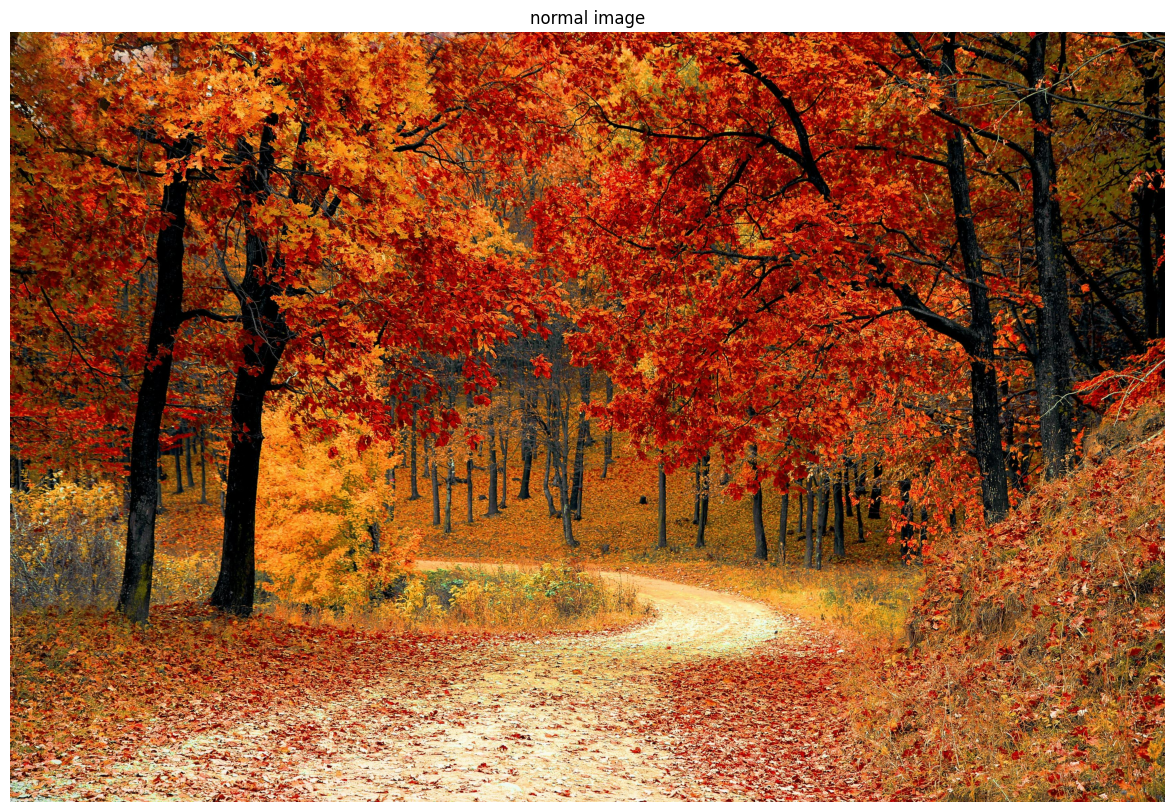

In [138]:
image_path='/content/drive/MyDrive/MyDataSet/Class1/nature1.jpg'

image=cv.imread(image_path)
imshow("normal image",image)


In [145]:
#TASK 15 -FINDING CORNERS

In [146]:
# Finding Waldo Using Template Matching
# Notes on Template Matching
# There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag cv2.TM_CCOEFF.

# So what exactly is the cv2.matchTemplate function doing? Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is.

# Regions with sufficiently high correlation can be considered “matches” for our waldo template. From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are. That’s really all there is to template matching!

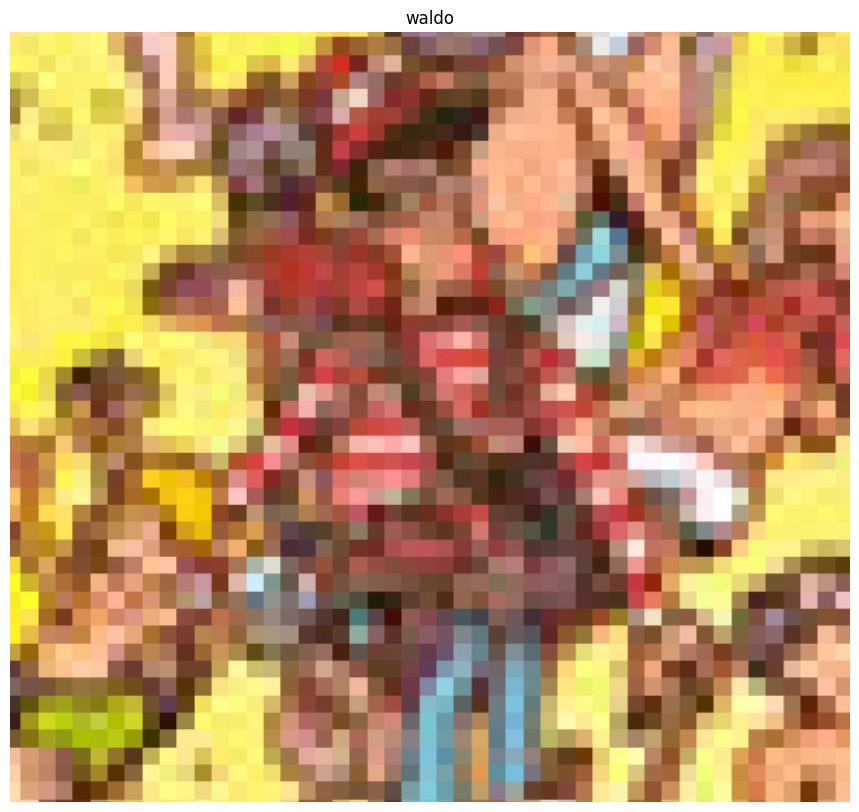

In [147]:
image_path='/content/drive/MyDrive/MyDataSet/SCLASS/waldo.jpg'
waldo=cv.imread(image_path)
imshow("waldo",waldo)

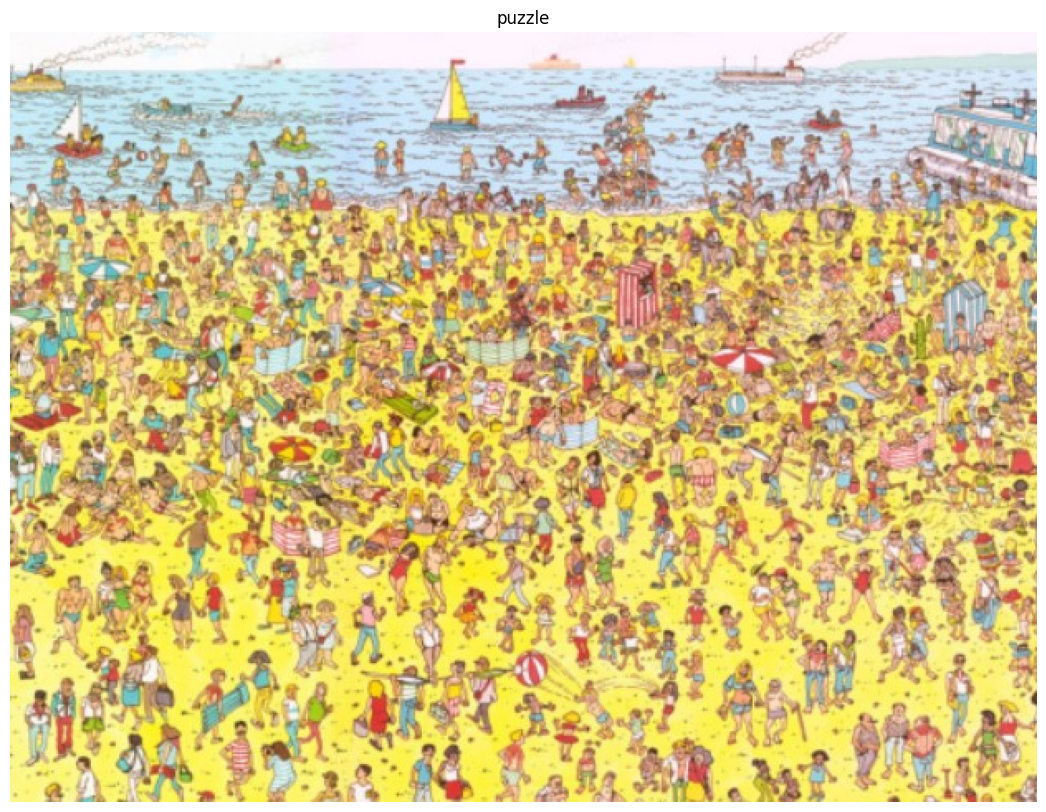

In [148]:
image_path='/content/drive/MyDrive/MyDataSet/SCLASS/beach.jpg'
beach=cv.imread(image_path)
imshow("puzzle",beach)

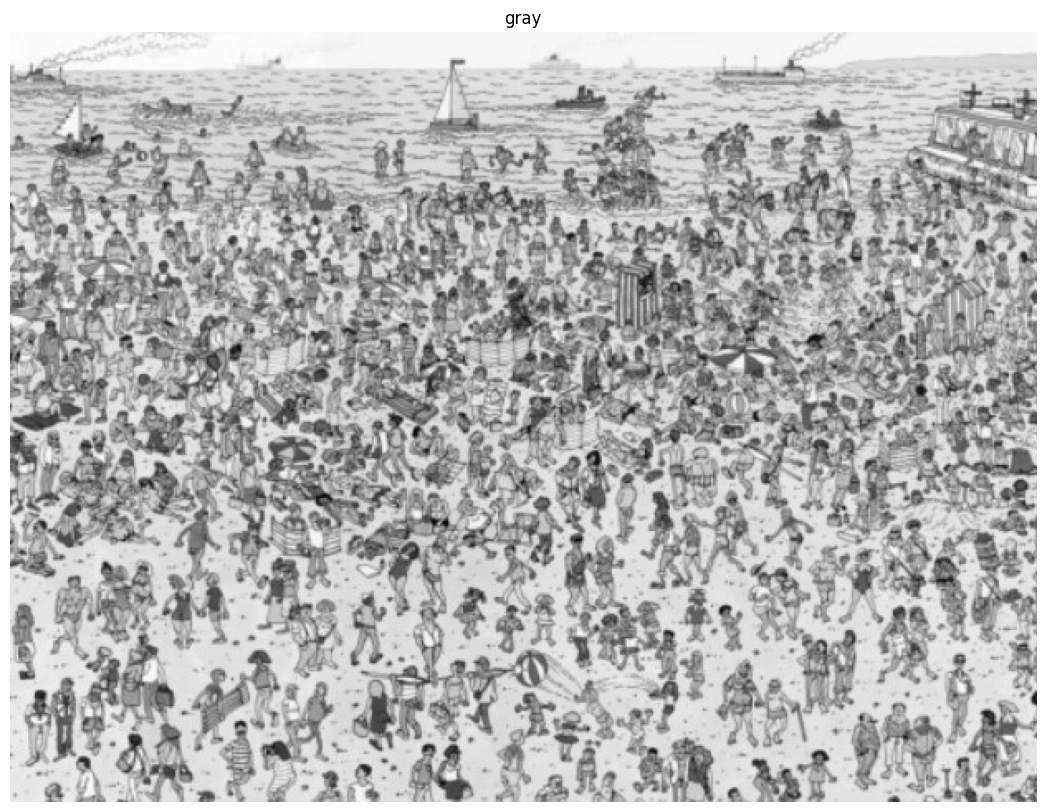

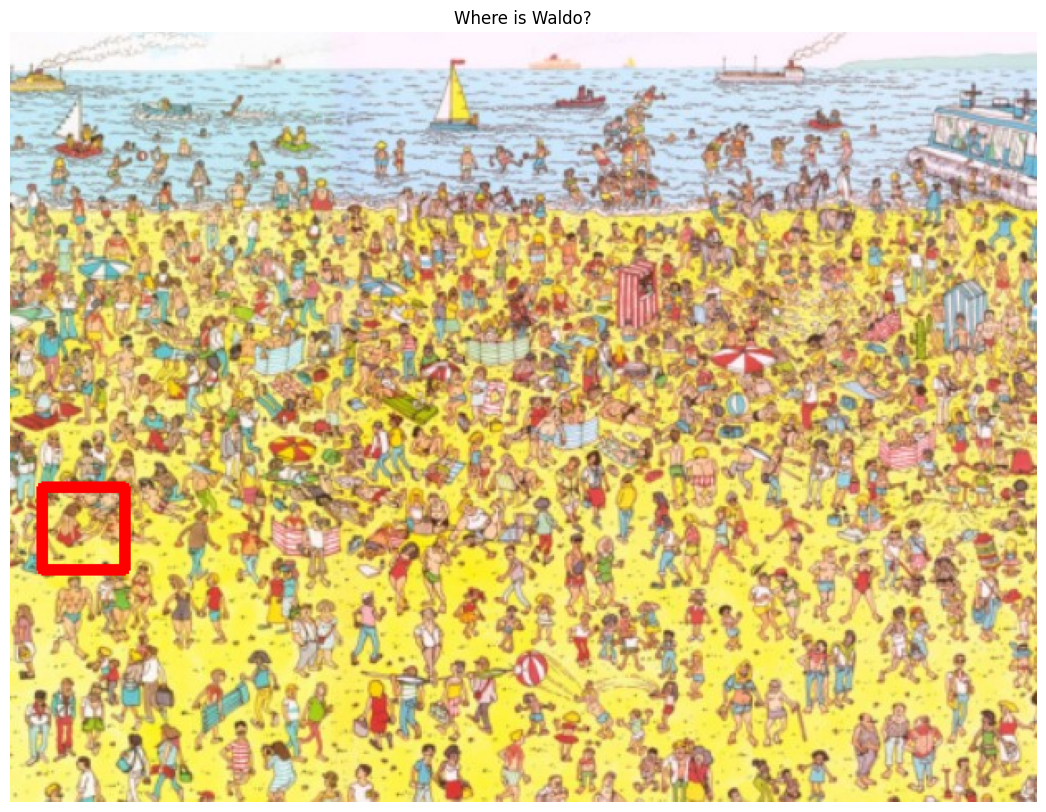

In [149]:
gray=cv.cvtColor(beach,cv.COLOR_BGR2GRAY)
imshow("gray",gray)

template=cv.cvtColor(waldo,cv.COLOR_BGR2GRAY)
result=cv.matchTemplate(gray,template,cv.TM_CCOEFF)
min_val,max_val,min_loc,max_loc=cv.minMaxLoc(result)


#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(beach, top_left, bottom_right, (0,0,255), 5)

imshow('Where is Waldo?', beach)